In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#Library to perform operations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Library for Logistic Regression
from sklearn.linear_model import LogisticRegression
#Library to save the models using Joblib
from sklearn.externals import joblib 
#Library to measure the squared error
from sklearn.metrics import mean_squared_error
#Library to load the dataset
from scipy.io import loadmat

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
#Loading the Dataset2
data_2 = loadmat('/content/dataset_1.mat')
print(data_2)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sat Sep 26 19:36:55 2020', '__version__': '1.0', '__globals__': [], 'samples': array([[ 0.03740109,  0.08861641],
       [ 0.57277163, -0.40655467],
       [ 0.27458618, -0.11676833],
       ...,
       [ 1.0391683 , -0.55422727],
       [ 0.1355146 , -0.01042329],
       [ 1.15340485, -0.48205253]]), 'labels': array([[1, 1, 1, ..., 1, 1, 1]])}


In [4]:
#Printing the keys of Data
print(data_2.keys()) 
#Printing the samples    
print(data_2['samples'])
#Printing the length of the Data
print(len(data_2))

dict_keys(['__header__', '__version__', '__globals__', 'samples', 'labels'])
[[ 0.03740109  0.08861641]
 [ 0.57277163 -0.40655467]
 [ 0.27458618 -0.11676833]
 ...
 [ 1.0391683  -0.55422727]
 [ 0.1355146  -0.01042329]
 [ 1.15340485 -0.48205253]]
5


In [5]:
#Printing the information related to the data
x_1 = data_2['samples']
y_1 = data_2['labels']
print("Samples Data Type",x_1.dtype)
print("Label Data Type",y_1.dtype)
print("Shape of Samples", x_1.shape)
print("Shape of Label", y_1.shape)

Samples Data Type float64
Label Data Type int64
Shape of Samples (5000, 2)
Shape of Label (1, 5000)


In [6]:
#Convert to DataFrame
sample_x = x_1[:,0]
sample_y = x_1[:,1]
label = y_1[0]
data_frame = pd.DataFrame(list(zip(sample_x,sample_y,label)), columns=["Sample_X","Sample_Y","Label"])
#Shuffle the Dataset
data_frame = data_frame.sample(frac = 1).reset_index(drop = True)
print(data_frame)

      Sample_X  Sample_Y  Label
0    -0.991119  0.394993      0
1     0.748644 -0.419766      1
2     1.940217  0.124685      1
3    -0.837885  0.416025      0
4     1.844670 -0.003531      1
...        ...       ...    ...
4995  0.986963  0.437430      0
4996 -0.894667  0.473013      0
4997  0.279155  0.979274      0
4998 -0.016541  0.943289      0
4999  0.011278  0.342601      1

[5000 rows x 3 columns]


In [7]:
#Dividing the Dataset into Samples and Labels separately after shuffling
data_y = data_frame['Label']
print(data_y)
data_x = data_frame.drop(["Label"],axis=1)
data_x.insert(0,'Sample_0',1.0)
print(data_x)

0       0
1       1
2       1
3       0
4       1
       ..
4995    0
4996    0
4997    0
4998    0
4999    1
Name: Label, Length: 5000, dtype: int64
      Sample_0  Sample_X  Sample_Y
0          1.0 -0.991119  0.394993
1          1.0  0.748644 -0.419766
2          1.0  1.940217  0.124685
3          1.0 -0.837885  0.416025
4          1.0  1.844670 -0.003531
...        ...       ...       ...
4995       1.0  0.986963  0.437430
4996       1.0 -0.894667  0.473013
4997       1.0  0.279155  0.979274
4998       1.0 -0.016541  0.943289
4999       1.0  0.011278  0.342601

[5000 rows x 3 columns]


In [8]:
# joblib.dump(data_frame, 'data_2.pkl')
# joblib.dump(data_x, 'data_x.pkl') 

In [9]:
#Printing the unique values of the Label
print(data_frame["Label"].unique())

[0 1]


### **Question 2a**

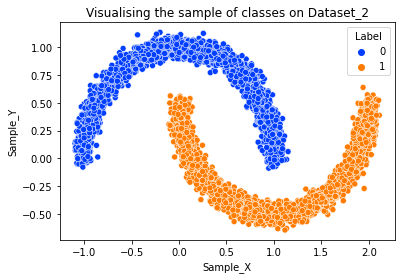

In [27]:
def Question2a(data_frame):
  palette = sns.color_palette("bright", 2) 
  #Plotting the scatterplot for each class using seaborn
  sns.scatterplot(data=data_frame, x="Sample_X",y="Sample_Y",hue = "Label",legend='full',palette=palette)
  plt.title("Visualising the sample of classes on Dataset_2")

data_frame = joblib.load('/content/data_2.pkl')
Question2a(data_frame)

In [11]:
#Function to split the Dataset into K-Folds 
def k_folds(k):
  #List to store the divided index of the training and testing data for K-Folds
  train_index = []
  test_index = []
  total_index=[]
  folds = [0]
  #Finding the point of Division
  div = int(data_x.shape[0]/k)
  total_index.extend(range(data_x.shape[0]))
  #Storing the points of division of the index
  for i in range(1,k):
    folds.append(div*i)
  folds.append(data_x.shape[0])
  #Keeping one fold of index for test and rest of the index for Train
  for i in range(len(folds)-1):
    test_list = []
    train_list = []
    test_list.extend(range(folds[i], folds[i+1]))
    train_list = list(set(total_index) - set(test_list))
    train_index.append(train_list)
    test_index.append(test_list)
  return train_index,test_index,k

### **Question 2b**

In [12]:
class LogRegressionn(object):
    def __init__(self):
      super(LogRegressionn, self).__init__()

    #Sigmoid Function
    def sigmoid(self,z):
      ans = 1/(1 + np.exp(-z))
      return ans

    #Calling the Hypothesis Function
    def hypothesis(self,X,theta):
      z =  X.dot(theta)
      h_theta = self.sigmoid(z)
      return h_theta

    #Finding the Coefficients/theta
    def find_coefficients(self,X_train,Y_train,learning_rate,iterations):
      theta_coef = np.zeros((X_train.shape[1]), dtype=float)
      theta_coef = theta_coef.reshape(X_train.shape[1],1)
      for i in range(iterations):
        x = np.array(X_train)
        #Predicting the Y value
        y_pred = self.hypothesis(x,theta_coef)
        #Actual Y value
        y_actual = np.array(Y_train).reshape(Y_train.shape[0],1)
        #Getting error 
        error = y_pred-y_actual
        #Finding the Gradient
        gradient = np.transpose(error).dot(x)
        for j in range(gradient.shape[1]):
          theta_coef[j] = theta_coef[j] - learning_rate * gradient[0][j]
      return theta_coef

    #fit function
    def fit(self,X_train,Y_train,alpha,iteration):
      self.theta = self.find_coefficients(X_train,Y_train,alpha,iteration)
      return self.theta

    #predict function
    def predict(self,X_test):
      predict_y = self.hypothesis(X_test,self.theta)
      return predict_y

In [13]:
#accuracy method to find accuracy
def accuracy(pred,actual):
  pred = np.array(pred)
  actual = np.array(actual).reshape(actual.shape[0],1)
  error = pred-actual
  val = (error == 0).sum()
  #Calculate the accuracy
  accuracy = val/pred.shape[0]
  return accuracy*100

In [14]:
#Calculate the loss 
def loss(pred,actual):
  #loss_1 = actual*log(pred)
  pred = np.array(pred).reshape(pred.shape[0],1)
  actual = np.array(actual).reshape(actual.shape[0],1)
  actual_1 = np.transpose(actual)
  loss_1 = actual_1.dot(np.log(pred))
  #loss_2 = (1-actual)*log(1-pred)
  ones_array = np.ones((actual.shape[0],1),dtype = float)
  actual_2 = np.transpose(ones_array - actual)
  pred_2 = np.log(ones_array-pred)
  loss_2 = actual_2.dot(pred_2)
  loss = loss_1 + loss_2
  loss = -loss[0][0]/actual.shape[0]
  return loss

### **Question 2c without save model**

In [15]:
# def Question2c(data_x,data_frame):
#   #Columns for printing the values for each fold
#   columns_names = ["Folds","Training Accuracy","Validation Accuracy"]
#   Q2_c = pd.DataFrame(columns = columns_names)
#   #Running for Number of Iterations
#   iterations = list(range(1, 101)) 
#   #Splitting the data into 5-Folds
#   train_index,test_index,fold = k_folds(5)
#   Question2c = []
#   #Loop for 5 folds
#   for i in range(fold):
#     #Storing the accuracy and loss for train and test data for number of iterations
#     acc_train_list = []
#     acc_test_list= []
#     loss_train_list = []
#     loss_test_list = []
#     #Loop for number of iterations
#     for j in range(len(iterations)):
#       #Dividing the Data into train and test
#       X_train = data_x.loc[train_index[i],:]
#       X_test = data_x.loc[test_index[i],:]
#       Y_train = data_frame.iloc[train_index[i],-1]    
#       Y_test = data_frame.iloc[test_index[i],-1]
#       #calling the LogRegression Class
#       model = LogRegressionn()
#       #Fitting the model with learning rate = 0.001
#       theta = model.fit(X_train,Y_train,0.001,iterations[j]) 
#       Question2c.append(model)
#       #Predicting the values for both train and test data
#       pred_train = model.predict(X_train)
#       pred_test = model.predict(X_test)
#       #Predicting the Accuracy for train and test data
#       acc_train = accuracy(round(pred_train),Y_train)
#       acc_train_list.append(acc_train)
#       acc_test = accuracy(round(pred_test),Y_test)
#       acc_test_list.append(acc_test)
#       #Predicting the loss for both train and test data
#       loss_train = loss(pred_train,Y_train)
#       loss_train_list.append(loss_train)
#       loss_test = loss(pred_test,Y_test)
#       loss_test_list.append(loss_test)

#     #Plotting the accuracy and loss graph vs number of iterations 
#     #for training and testing data
#     print("Fold ", i+1)
#     plt.plot(iterations,acc_train_list, label = "Training Accuracy")
#     plt.plot(iterations,acc_test_list, label = "Validation Accuracy")
#     plt.xlabel('Iterations') 
#     plt.ylabel('Training and Validation Accuracy') 
#     plt.title('Training and Validation Accuracy vs Iterations') 
#     plt.legend()  
#     plt.show() 
#     plt.plot(iterations,loss_train_list, label = "Training Loss")
#     plt.plot(iterations,loss_test_list, label = "Validation Loss")
#     plt.xlabel('Iterations') 
#     plt.ylabel('Training and Validation Loss') 
#     plt.title('Training and Validation Loss vs Iterations') 
#     plt.legend()  
#     plt.show() 
#     Q2_c = Q2_c.append({'Folds':i+1,'Training Accuracy':acc_train,'Validation Accuracy':acc_test},ignore_index=True)
#   print(Q2_c)
#   joblib.dump(Question2c, 'Question2c.pkl') 

# data_frame = joblib.load('/content/data_2.pkl')
# data_x = joblib.load('/content/data_x.pkl')
# #calling the Function for Question 2c
# Question2c(data_x,data_frame)

### **Question 2c with save model**

Fold  1


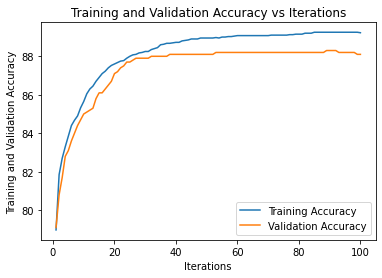

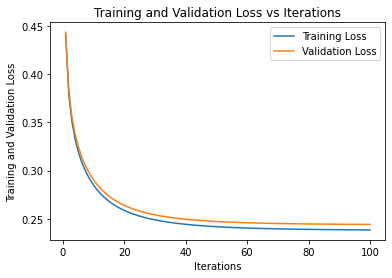

Fold  2


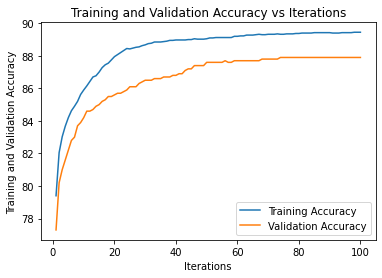

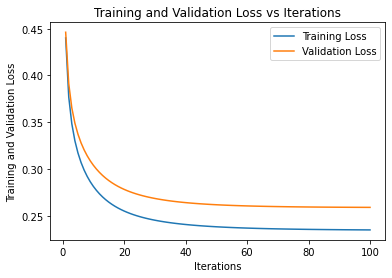

Fold  3


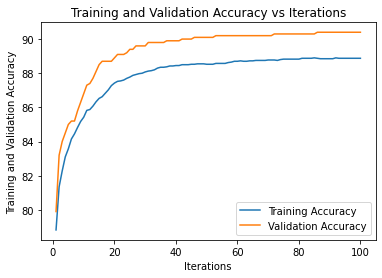

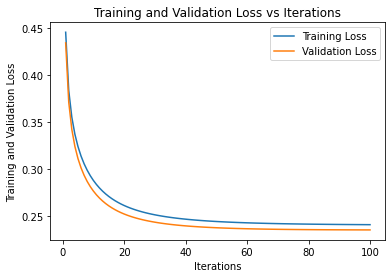

Fold  4


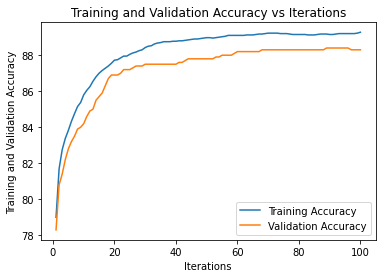

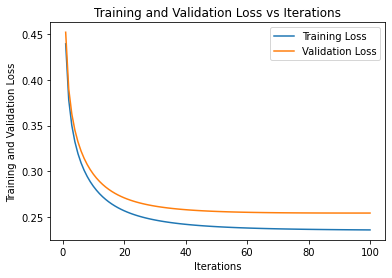

Fold  5


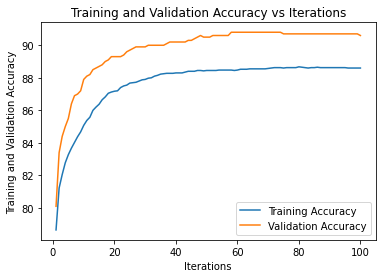

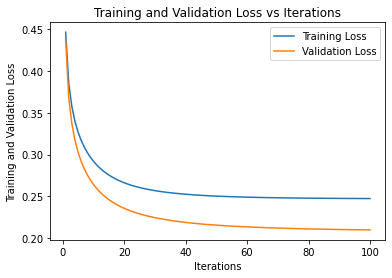

   Folds  Training Accuracy  Validation Accuracy
0    1.0             89.225                 88.1
1    2.0             89.450                 87.9
2    3.0             88.875                 90.4
3    4.0             89.275                 88.3
4    5.0             88.600                 90.6


In [16]:
def Question2c(data_x,data_frame):
  #Columns for printing the values for each fold
  columns_names = ["Folds","Training Accuracy","Validation Accuracy"]
  Q2_c = pd.DataFrame(columns = columns_names)
  #Running for Number of Iterations
  iterations = list(range(1, 101)) 
  #Splitting the data into 5-Folds
  train_index,test_index,fold = k_folds(5)
  model = joblib.load('/content/Question2c.pkl')
  #variable to access the models from list
  k = 0
  #Loop for 5 folds
  for i in range(fold):
    #Storing the accuracy and loss for train and test data for number of iterations
    acc_train_list = []
    acc_test_list= []
    loss_train_list = []
    loss_test_list = []
    #Loop for number of iterations
    for j in range(len(iterations)):
      #Dividing the Data into train and test
      X_train = data_x.loc[train_index[i],:]
      X_test = data_x.loc[test_index[i],:]
      Y_train = data_frame.iloc[train_index[i],-1]    
      Y_test = data_frame.iloc[test_index[i],-1]
      pred_train = model[k].predict(X_train)
      pred_test = model[k].predict(X_test)
      k += 1
      #Predicting the Accuracy for train and test data
      acc_train = accuracy(round(pred_train),Y_train)
      acc_train_list.append(acc_train)
      acc_test = accuracy(round(pred_test),Y_test)
      acc_test_list.append(acc_test)
      #Predicting the loss for both train and test data
      loss_train = loss(pred_train,Y_train)
      loss_train_list.append(loss_train)
      loss_test = loss(pred_test,Y_test)
      loss_test_list.append(loss_test)

    #Plotting the accuracy and loss graph vs number of iterations 
    #for training and testing data
    print("Fold ", i+1)
    plt.plot(iterations,acc_train_list, label = "Training Accuracy")
    plt.plot(iterations,acc_test_list, label = "Validation Accuracy")
    plt.xlabel('Iterations') 
    plt.ylabel('Training and Validation Accuracy') 
    plt.title('Training and Validation Accuracy vs Iterations') 
    plt.legend()  
    plt.show() 
    plt.plot(iterations,loss_train_list, label = "Training Loss")
    plt.plot(iterations,loss_test_list, label = "Validation Loss")
    plt.xlabel('Iterations') 
    plt.ylabel('Training and Validation Loss') 
    plt.title('Training and Validation Loss vs Iterations') 
    plt.legend()  
    plt.show() 
    Q2_c = Q2_c.append({'Folds':i+1,'Training Accuracy':acc_train,'Validation Accuracy':acc_test},ignore_index=True)
  print(Q2_c)

data_frame = joblib.load('/content/data_2.pkl')
data_x = joblib.load('/content/data_x.pkl')
#calling the Function for Question 2c
Question2c(data_x,data_frame)

### **Question 2d**

In [17]:
class LogRegression(object):
    def __init__(self):
      super(LogRegression, self).__init__()

    #Sigmoid Function
    def sigmoid(self,z):
      ans = 1/(1 + np.exp(-z))
      return ans

    #Calling the Hypothesis Function
    def hypothesis(self,X,theta):
      z =  X.dot(theta)
      h_theta = self.sigmoid(z)
      return h_theta

    #Finding the Coefficients/theta
    def find_coefficients(self,X_train,Y_train,learning_rate,iterations,lamb):
      theta_coef = np.zeros((X_train.shape[1]), dtype=float)
      theta_coef = theta_coef.reshape(X_train.shape[1],1)
      for i in range(iterations):
        x = np.array(X_train)
        #Predicting the Y value
        y_pred = self.hypothesis(x,theta_coef)
        #Actual Y value
        y_actual = np.array(Y_train).reshape(Y_train.shape[0],1)
        #Getting error 
        error = y_pred-y_actual
        #Finding the Gradient
        gradient = np.transpose(error).dot(x)
        for j in range(gradient.shape[1]):
          theta_coef[j] = theta_coef[j] - learning_rate * (lamb * theta_coef[j] + gradient[0][j])
      return theta_coef

    #fit function
    def fit(self,X_train,Y_train,alpha,iteration,lamb):
      self.theta = self.find_coefficients(X_train,Y_train,alpha,iteration,lamb)
      return self.theta

    #predict function
    def predict(self,X_test):
      predict_y = self.hypothesis(X_test,self.theta)
      return predict_y

In [18]:
#accuracy method to find accuracy
def accuracy(pred,actual):
  pred = np.array(pred)
  actual = np.array(actual).reshape(actual.shape[0],1)
  error = pred-actual
  val = (error == 0).sum()
  #Calculate the accuracy
  accuracy = val/pred.shape[0]
  return accuracy*100

In [19]:
#Calculating the loss with l2 regularization
def loss_lam(pred,actual,theta,lamb):
  #loss_1 = actual*log(pred)
  pred = np.array(pred).reshape(pred.shape[0],1)
  actual = np.array(actual).reshape(actual.shape[0],1)
  actual_1 = np.transpose(actual)
  loss_1 = actual_1.dot(np.log(pred))
  #loss_2 = (1-actual)*log(1-pred)
  ones_array = np.ones((actual.shape[0],1),dtype = float)
  actual_2 = np.transpose(ones_array - actual)
  pred_2 = np.log(ones_array-pred)
  loss_2 = actual_2.dot(pred_2)
  loss = loss_1 + loss_2
  loss = -loss[0][0]/actual.shape[0]
  #Adding the l2 parameter
  theta1 = np.delete(theta,0,0)
  theta1 = np.power(theta1,2)
  sum = theta1.sum()
  loss += (sum*lamb)/2
  return loss

In [20]:
# #Find best lambda
# def find_best_lambda(fold,train_index,test_index,data_x,data_frame):
#   #List of lambdas
#   lamb = [0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28, 2.56, 5.24,10.28]
#   #Running for Number of Iterations
#   iterations = list(range(1, 101)) 
#   #Best lambda
#   best_lamb = []
#   best_lambda_models = []
#   #Loop for 5 folds
#   for i in range(fold):
#     best_accuracy_train = 0
#     best_accuracy_test = 0 
#     #Storing the accuracies
#     acc_train_list = []
#     acc_test_list= []
#     lamb1 = 0
#     #Iterating over the lambdas
#     for k in range(len(lamb)):
#       for j in range(len(iterations)):
#         X_train = data_x.loc[train_index[i],:]
#         X_test = data_x.loc[test_index[i],:]
#         Y_train = data_frame.iloc[train_index[i],-1]    
#         Y_test = data_frame.iloc[test_index[i],-1]
#         #calling the LogRegression Class
#         model = LogRegression()
#         theta = model.fit(X_train,Y_train,0.001,iterations[j],lamb[k])
#         best_lambda_models.append(model)
#         #Predicting over train and test data 
#         pred_train = model.predict(X_train)
#         pred_test = model.predict(X_test)
#         #Finding the accuracy
#         acc_train = accuracy(round(pred_train),Y_train)
#         acc_train_list.append(acc_train)
#         acc_test = accuracy(round(pred_test),Y_test)
#         acc_test_list.append(acc_test)
#       #Checking for the best accuracy
#       if best_accuracy_train <= acc_train and best_accuracy_test <= acc_test:
#         best_accuracy_train = acc_train
#         best_accuracy_test = acc_test
#         lamb1 = lamb[k]
#     #Storing the best lambda value
#     best_lamb.append(lamb1)

#   joblib.dump(best_lambda_models, 'Best_lambda.pkl')
#   #returning the best lambda
#   return max(set(best_lamb), key = best_lamb.count) 
  

In [21]:
#Find best lambda
def find_best_lambda(fold,train_index,test_index,data_x,data_frame):
  #List of lambdas
  lamb = [0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28, 2.56, 5.24,10.28]
  #Running for Number of Iterations
  iterations = list(range(1, 101)) 
  #Best lambda
  best_lamb = []
  model = joblib.load('/content/Best_lambda.pkl')
  #variable to access the models from list
  m = 0
  #Loop for 5 folds
  for i in range(fold):
    best_accuracy_train = 0
    best_accuracy_test = 0 
    #Storing the accuracies
    acc_train_list = []
    acc_test_list= []
    lamb1 = 0
    #Iterating over the lambdas
    for k in range(len(lamb)):
      for j in range(len(iterations)):
        X_train = data_x.loc[train_index[i],:]
        X_test = data_x.loc[test_index[i],:]
        Y_train = data_frame.iloc[train_index[i],-1]    
        Y_test = data_frame.iloc[test_index[i],-1]
        #calling the LogRegression Class
        pred_train = model[m].predict(X_train)
        pred_test = model[m].predict(X_test)
        m += 1
        #Finding the accuracy
        acc_train = accuracy(round(pred_train),Y_train)
        acc_train_list.append(acc_train)
        acc_test = accuracy(round(pred_test),Y_test)
        acc_test_list.append(acc_test)
      #Checking for the best accuracy
      if best_accuracy_train <= acc_train and best_accuracy_test <= acc_test:
        best_accuracy_train = acc_train
        best_accuracy_test = acc_test
        lamb1 = lamb[k]
    #Storing the best lambda value
    best_lamb.append(lamb1)

  #returning the best lambda
  return max(set(best_lamb), key = best_lamb.count) 
  

### **Question 2d without save model**

In [22]:
# def Question2d(data_x,data_frame):
#   #Columns for printing the values for each fold
#   columns_names = ["Folds","Training Accuracy","Validation Accuracy"]
#   Q2_d = pd.DataFrame(columns = columns_names)
#   #Splitting the data into 5-Folds
#   train_index,test_index,fold = k_folds(5)
#   #Running for Number of Iterations
#   iterations = list(range(1, 101)) 
#   #Splitting the data into 5-Folds
#   train_index,test_index,fold = k_folds(5)
#   #Find the best lambda
#   lamb = find_best_lambda(fold,train_index,test_index,data_x,data_frame)
#   print("Best Lambda is",lamb)
#   Question2d = []
#   Question2d_theta = []

#   #Loop for 5 folds
#   for i in range(fold):
#     #Storing the accuracy and loss
#     acc_train_list = []
#     acc_test_list= []
#     loss_train_list = []
#     loss_test_list = []
#     #Running over the number of iterations
#     for j in range(len(iterations)):
#       X_train = data_x.loc[train_index[i],:]
#       X_test = data_x.loc[test_index[i],:]
#       Y_train = data_frame.iloc[train_index[i],-1]    
#       Y_test = data_frame.iloc[test_index[i],-1]
#       #Calling the LogRegression Class
#       model = LogRegression()
#       #Fitting the model
#       theta = model.fit(X_train,Y_train,0.001,iterations[j],lamb)
#       Question2d.append(model)
#       Question2d_theta.append(theta) 
#       #predicting over the test and train
#       pred_train = model.predict(X_train)
#       pred_test = model.predict(X_test)
#       #Calculating the acccuracy over test and train data
#       acc_train = accuracy(round(pred_train),Y_train)
#       acc_train_list.append(acc_train)
#       acc_test = accuracy(round(pred_test),Y_test)
#       acc_test_list.append(acc_test)
#       #Calculatingting the loss over test and train data
#       loss_train = loss_lam(pred_train,Y_train,theta,lamb)
#       loss_train_list.append(loss_train)
#       loss_test = loss_lam(pred_test,Y_test,theta,lamb)
#       loss_test_list.append(loss_test)
    
#     #Plotting the accuracy and loss graph vs number of iterations 
#     #for training and testing data
#     plt.plot(iterations,acc_train_list, label = "Training Accuracy")
#     plt.plot(iterations,acc_test_list, label = "Testing Accuracy")
#     plt.xlabel('Iterations') 
#     plt.ylabel('Training and Validation Accuracy') 
#     plt.title('Training and Validation Accuracy vs Iterations') 
#     plt.legend()  
#     plt.show() 
#     plt.plot(iterations,loss_train_list, label = "Training Loss")
#     plt.plot(iterations,loss_test_list, label = "Testing Loss")
#     plt.xlabel('Iterations') 
#     plt.ylabel('Training and Validation Loss') 
#     plt.title('Training and Validation Loss vs Iterations') 
#     plt.legend()  
#     plt.show() 
#     Q2_d = Q2_d.append({'Folds':int(i+1),'Training Accuracy':acc_train,'Validation Accuracy':acc_test},ignore_index=True)
#   print(Q2_d)
#   joblib.dump(Question2d,'Question2d.pkl')
#   joblib.dump(Question2d_theta,'Question2d_theta.pkl')

# data_frame = joblib.load('/content/data_2.pkl')
# data_x = joblib.load('/content/data_x.pkl')
# #calling the Function for Question 2d
# Question2d(data_x,data_frame)

### **Question 2d with save model**

Best Lambda is 0.64


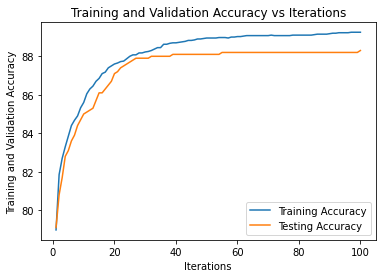

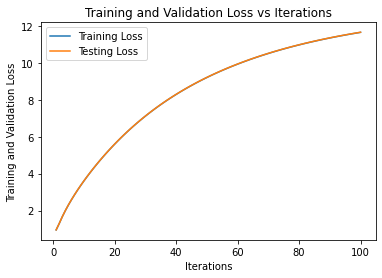

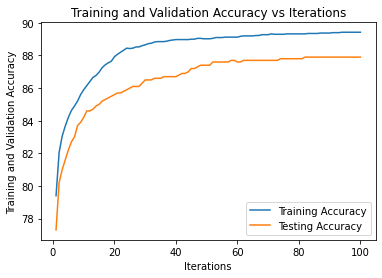

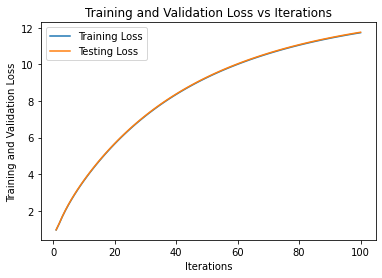

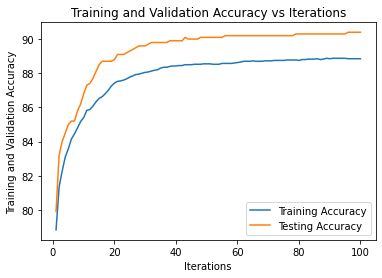

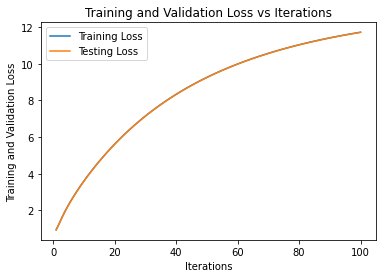

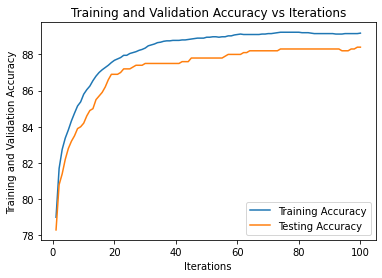

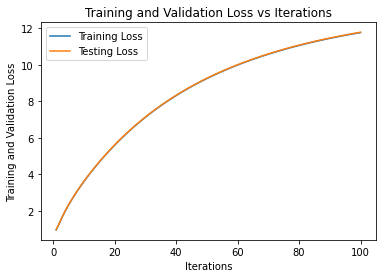

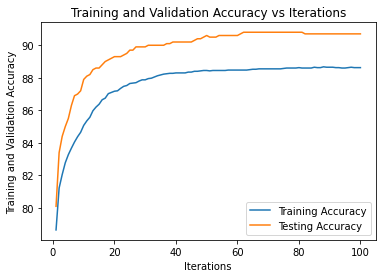

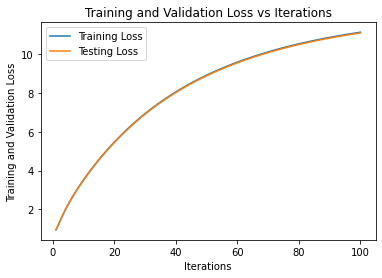

   Folds  Training Accuracy  Validation Accuracy
0    1.0             89.250                 88.3
1    2.0             89.425                 87.9
2    3.0             88.850                 90.4
3    4.0             89.175                 88.4
4    5.0             88.625                 90.7


In [23]:
def Question2d(data_x,data_frame):
  #Columns for printing the values for each fold
  columns_names = ["Folds","Training Accuracy","Validation Accuracy"]
  Q2_d = pd.DataFrame(columns = columns_names)
  #Splitting the data into 5-Folds
  train_index,test_index,fold = k_folds(5)
  #Running for Number of Iterations
  iterations = list(range(1, 101)) 
  #Splitting the data into 5-Folds
  train_index,test_index,fold = k_folds(5)
  #Find the best lambda
  lamb = find_best_lambda(fold,train_index,test_index,data_x,data_frame)
  print("Best Lambda is",lamb)
  model = joblib.load('/content/Question2d.pkl')
  theta = joblib.load('/content/Question2d_theta.pkl')
  #Variable to access the models
  m = 0
  #Loop for 5 folds
  for i in range(fold):
    #Storing the accuracy and loss
    acc_train_list = []
    acc_test_list= []
    loss_train_list = []
    loss_test_list = []
    #Running over the number of iterations
    for j in range(len(iterations)):
      X_train = data_x.loc[train_index[i],:]
      X_test = data_x.loc[test_index[i],:]
      Y_train = data_frame.iloc[train_index[i],-1]    
      Y_test = data_frame.iloc[test_index[i],-1]
      #predicting over the test and train
      pred_train = model[m].predict(X_train)
      pred_test = model[m].predict(X_test)
      #Calculating the acccuracy over test and train data
      acc_train = accuracy(round(pred_train),Y_train)
      acc_train_list.append(acc_train)
      acc_test = accuracy(round(pred_test),Y_test)
      acc_test_list.append(acc_test)
      #Calculatingting the loss over test and train data
      loss_train = loss_lam(pred_train,Y_train,theta[m],lamb)
      loss_train_list.append(loss_train)
      loss_test = loss_lam(pred_test,Y_test,theta[m],lamb)
      loss_test_list.append(loss_test)
      m += 1
    
    #Plotting the accuracy and loss graph vs number of iterations 
    #for training and testing data
    plt.plot(iterations,acc_train_list, label = "Training Accuracy")
    plt.plot(iterations,acc_test_list, label = "Testing Accuracy")
    plt.xlabel('Iterations') 
    plt.ylabel('Training and Validation Accuracy') 
    plt.title('Training and Validation Accuracy vs Iterations') 
    plt.legend()  
    plt.show() 
    plt.plot(iterations,loss_train_list, label = "Training Loss")
    plt.plot(iterations,loss_test_list, label = "Testing Loss")
    plt.xlabel('Iterations') 
    plt.ylabel('Training and Validation Loss') 
    plt.title('Training and Validation Loss vs Iterations') 
    plt.legend()  
    plt.show() 
    Q2_d = Q2_d.append({'Folds':int(i+1),'Training Accuracy':acc_train,'Validation Accuracy':acc_test},ignore_index=True)
  print(Q2_d)

data_frame = joblib.load('/content/data_2.pkl')
data_x = joblib.load('/content/data_x.pkl')
#calling the Function for Question 2d
Question2d(data_x,data_frame)

### **Question 2e without save model**

In [24]:
# def Question2e(data_x,data_frame):
#   #Columns for printing the values for each fold
#   columns_names = ["Folds","Training Accuracy","Validation Accuracy"]
#   Q2_e = pd.DataFrame(columns = columns_names)
#   #Splitting the data into 5-Folds
#   train_index,test_index,fold = k_folds(5)
#   Question2e = []
#   #Loop over the folds
#   for i in range(fold):
#     X_train = data_x.loc[train_index[i],:]
#     X_test = data_x.loc[test_index[i],:]
#     Y_train = data_frame.iloc[train_index[i],-1]    
#     Y_test = data_frame.iloc[test_index[i],-1] 
#     #Calling the sklearn Logistic regression
#     model = LogisticRegression(random_state=0)
#     model = model.fit(X_train,Y_train)
#     Question2e.append(model)
#     #predicting over the test and train
#     pred_test = model.predict(X_test)
#     pred_train = model.predict(X_train)
#     #calculating the train and test accuracy
#     train_acc = model.score(X_train, Y_train)*100
#     test_acc = model.score(X_test, Y_test)*100
#     Q2_e = Q2_e.append({'Folds':i+1,'Training Accuracy':train_acc,'Validation Accuracy':test_acc},ignore_index=True)
#   print(Q2_e)
#   joblib.dump(Question2e, 'Question2e.pkl')

# data_frame = joblib.load('/content/data_2.pkl')
# data_x = joblib.load('/content/data_x.pkl')
# #calling the Function for Question 2e
# Question2e(data_x,data_frame)

### **Question 2e with save model**

In [25]:
def Question2e(data_x,data_frame):
  #Columns for printing the values for each fold
  columns_names = ["Folds","Training Accuracy","Validation Accuracy"]
  Q2_e = pd.DataFrame(columns = columns_names)
  #Splitting the data into 5-Folds
  train_index,test_index,fold = k_folds(5)
  model = joblib.load('/content/Question2e.pkl')
  #Variable to access the models
  m = 0
  #Loop over the folds
  for i in range(fold):
    X_train = data_x.loc[train_index[i],:]
    X_test = data_x.loc[test_index[i],:]
    Y_train = data_frame.iloc[train_index[i],-1]    
    Y_test = data_frame.iloc[test_index[i],-1] 
    #predicting over the test and train
    pred_test = model[m].predict(X_test)
    pred_train = model[m].predict(X_train)
    #calculating the train and test accuracy
    train_acc = model[m].score(X_train, Y_train)*100
    test_acc = model[m].score(X_test, Y_test)*100
    m += 1
    Q2_e = Q2_e.append({'Folds':i+1,'Training Accuracy':train_acc,'Validation Accuracy':test_acc},ignore_index=True)
  print(Q2_e)

data_frame = joblib.load('/content/data_2.pkl')
data_x = joblib.load('/content/data_x.pkl')
#calling the Function for Question 2e
Question2e(data_x,data_frame)

   Folds  Training Accuracy  Validation Accuracy
0    1.0             89.275                 88.1
1    2.0             89.500                 87.9
2    3.0             88.850                 90.2
3    4.0             89.200                 88.1
4    5.0             88.550                 90.7
